In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
from pathlib import Path

from matplotlib.pyplot import xticks

In [2]:
# Define the project paths
project_dir = Path(os.getcwd()).resolve().parent
model_dir = project_dir / 'Model'
stats_dir = model_dir / 'stats'
plots_dir = model_dir / 'plots'

In [3]:
resnet_frozen_training = pd.read_csv(stats_dir / 'resnet34_frozen_training_logs.csv')
resnet_unfrozen_training = pd.read_csv(stats_dir / 'resnet34_unfrozen_training_logs.csv')

In [4]:
resnet_frozen_training

,epoch,train_loss,valid_loss,accuracy,time
0,0,1.075846,1.066483,0.733437,6:58:33
1,1,0.689019,0.695668,0.794123,6:55:09
2,2,0.603853,0.591300,0.816935,6:40:09
3,3,0.552373,0.586212,0.816815,6:40:06
4,4,0.536650,0.573358,0.816482,6:40:04
5,5,0.582708,0.551801,0.824577,6:40:14
6,6,0.492055,0.539689,0.830766,6:41:02
7,7,0.520204,0.549170,0.827792,6:41:30
8,8,0.487364,0.539077,0.829315,6:35:27
9,9,0.508232,0.543166,0.826663,6:40:29


In [51]:
# read the classification report it is a txt file and make it to a pandas dataframe
#df = pd.read_csv(stats_dir /'resnet34_frozen_classification_report.txt', sep='\s+', index_col=0)
df = pd.read_csv(stats_dir /'resnet34_unfrozen_classification_report.txt', sep='\s+', index_col=0)
df

,precision,recall,f1-score,support
grabbing,1.00,1.00,1.00,4500
grip,1.00,1.00,1.00,4388
holy,1.00,0.98,0.99,5000
point,0.99,1.00,0.99,4411
call,1.00,0.99,1.00,4550
three3,1.00,1.00,1.00,4501
timeout,0.98,0.99,0.99,5000
xsign,1.00,0.99,0.99,5000
hand_heart,0.97,1.00,0.98,5000
hand_heart2,1.00,0.96,0.98,5000


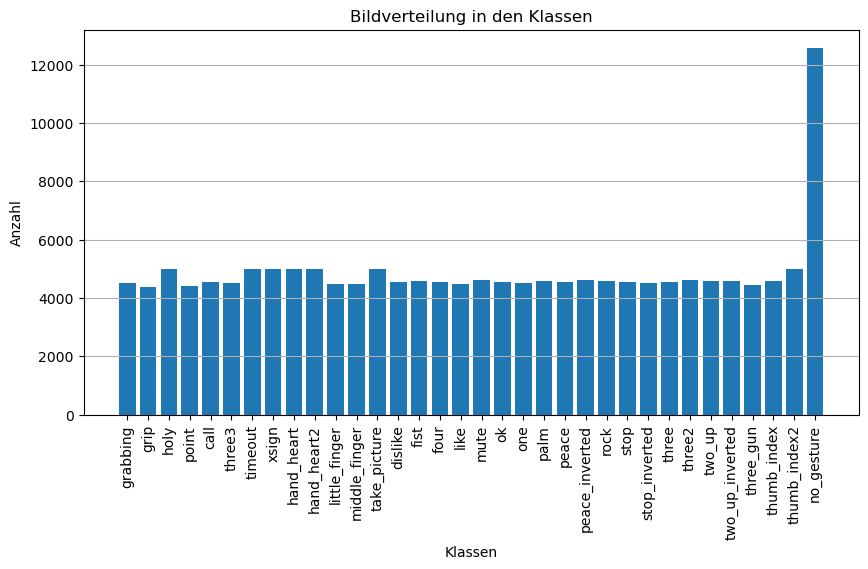

In [35]:
df_histo = df.iloc[:-3]

plt.figure(figsize=(10, 5))
plt.bar(df_histo.index, df_histo['support'])
plt.title('Bildverteilung in den Klassen')
plt.xlabel('Klassen')
plt.ylabel('Anzahl')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

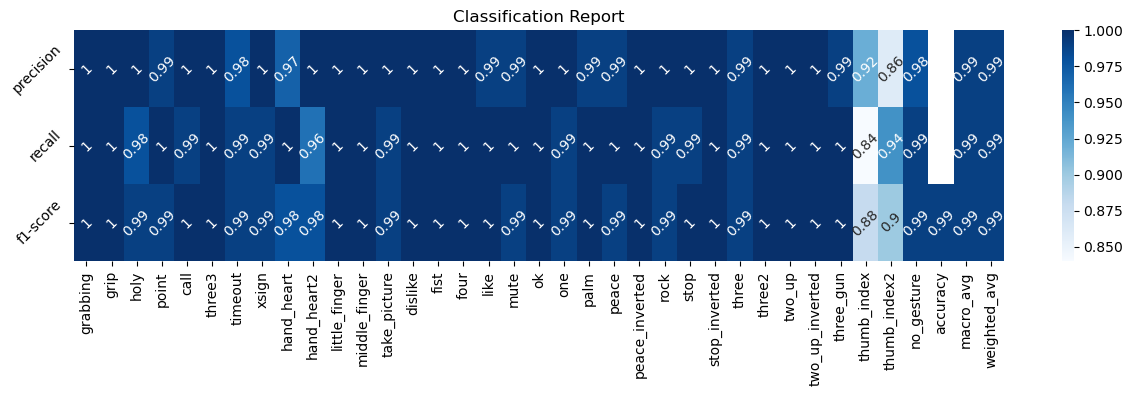

In [52]:
df_class = df.drop('support', axis=1)
df_class = df_class.T
# make a plot for the classification report as a heatmap and rotate the plot 90°
plt.figure(figsize=(15, 3))
sns.heatmap(df_class, annot=True, fmt='g', cmap='Blues', annot_kws={'rotation': 45})
plt.title('Classification Report')
plt.yticks(rotation=45)
plt.show()

In [18]:
resnet_unfrozen_training

,epoch,train_loss,valid_loss,accuracy,time
0,0,0.055158,0.065885,0.979698,13:09:32
1,1,0.069566,0.079825,0.975101,13:25:03
2,2,0.065782,0.100608,0.970302,13:26:59
3,3,0.047743,0.065125,0.980514,13:20:16
4,4,0.077416,0.080488,0.977913,13:52:17
5,5,0.026937,0.064592,0.982329,14:05:07
6,6,0.022664,0.059595,0.982863,14:22:02
7,7,0.022567,0.056169,0.984688,14:22:28
8,8,0.007101,0.053871,0.987581,13:51:22


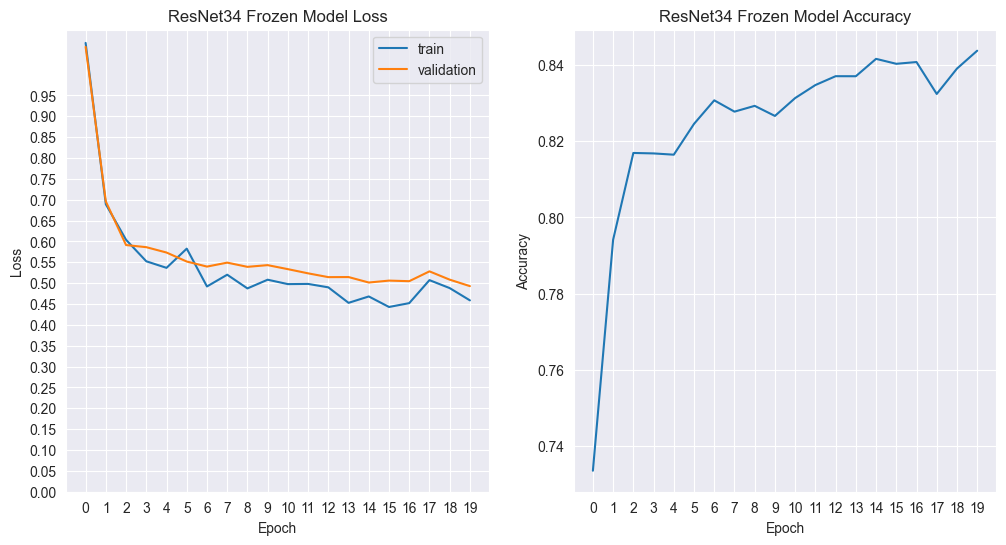

In [32]:
# Plot the loss and accuracy for the frozen model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(resnet_frozen_training['train_loss'], label='train')
plt.plot(resnet_frozen_training['valid_loss'], label='validation')
plt.title('ResNet34 Frozen Model Loss')
plt.xticks(np.arange(0, 20, 1))
plt.yticks(np.arange(0, 1, 0.05))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(resnet_frozen_training['accuracy'])
plt.title('ResNet34 Frozen Model Accuracy')
plt.xticks(np.arange(0, 20, 1))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


plt.show()

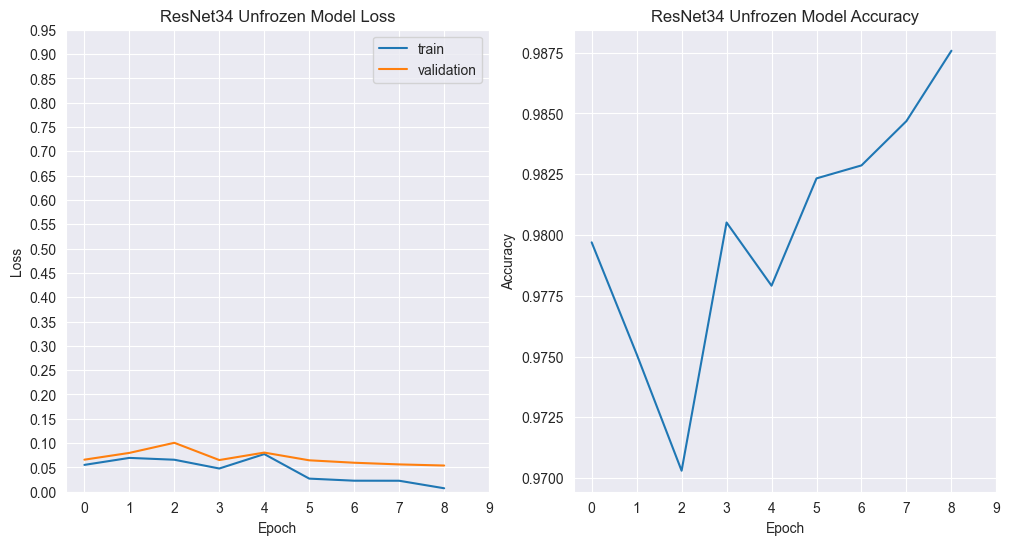

In [34]:
# Plot the loss and accuracy for the unfrozen model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(resnet_unfrozen_training['train_loss'], label='train')
plt.plot(resnet_unfrozen_training['valid_loss'], label='validation')
plt.title('ResNet34 Unfrozen Model Loss')
plt.xticks(np.arange(0, 10, 1))
plt.yticks(np.arange(0, 1, 0.05))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(resnet_unfrozen_training['accuracy'])
plt.title('ResNet34 Unfrozen Model Accuracy')
plt.xticks(np.arange(0, 10, 1))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


plt.show()

In [21]:
# Open confusion matrix for the frozen model
frozen_cm = mpimg.imread(plots_dir / 'resnet34_frozen_confusion_matrix.png')
unfrozen_cm = mpimg.imread(plots_dir / 'resnet34_unfrozen_confusion_matrix.png')

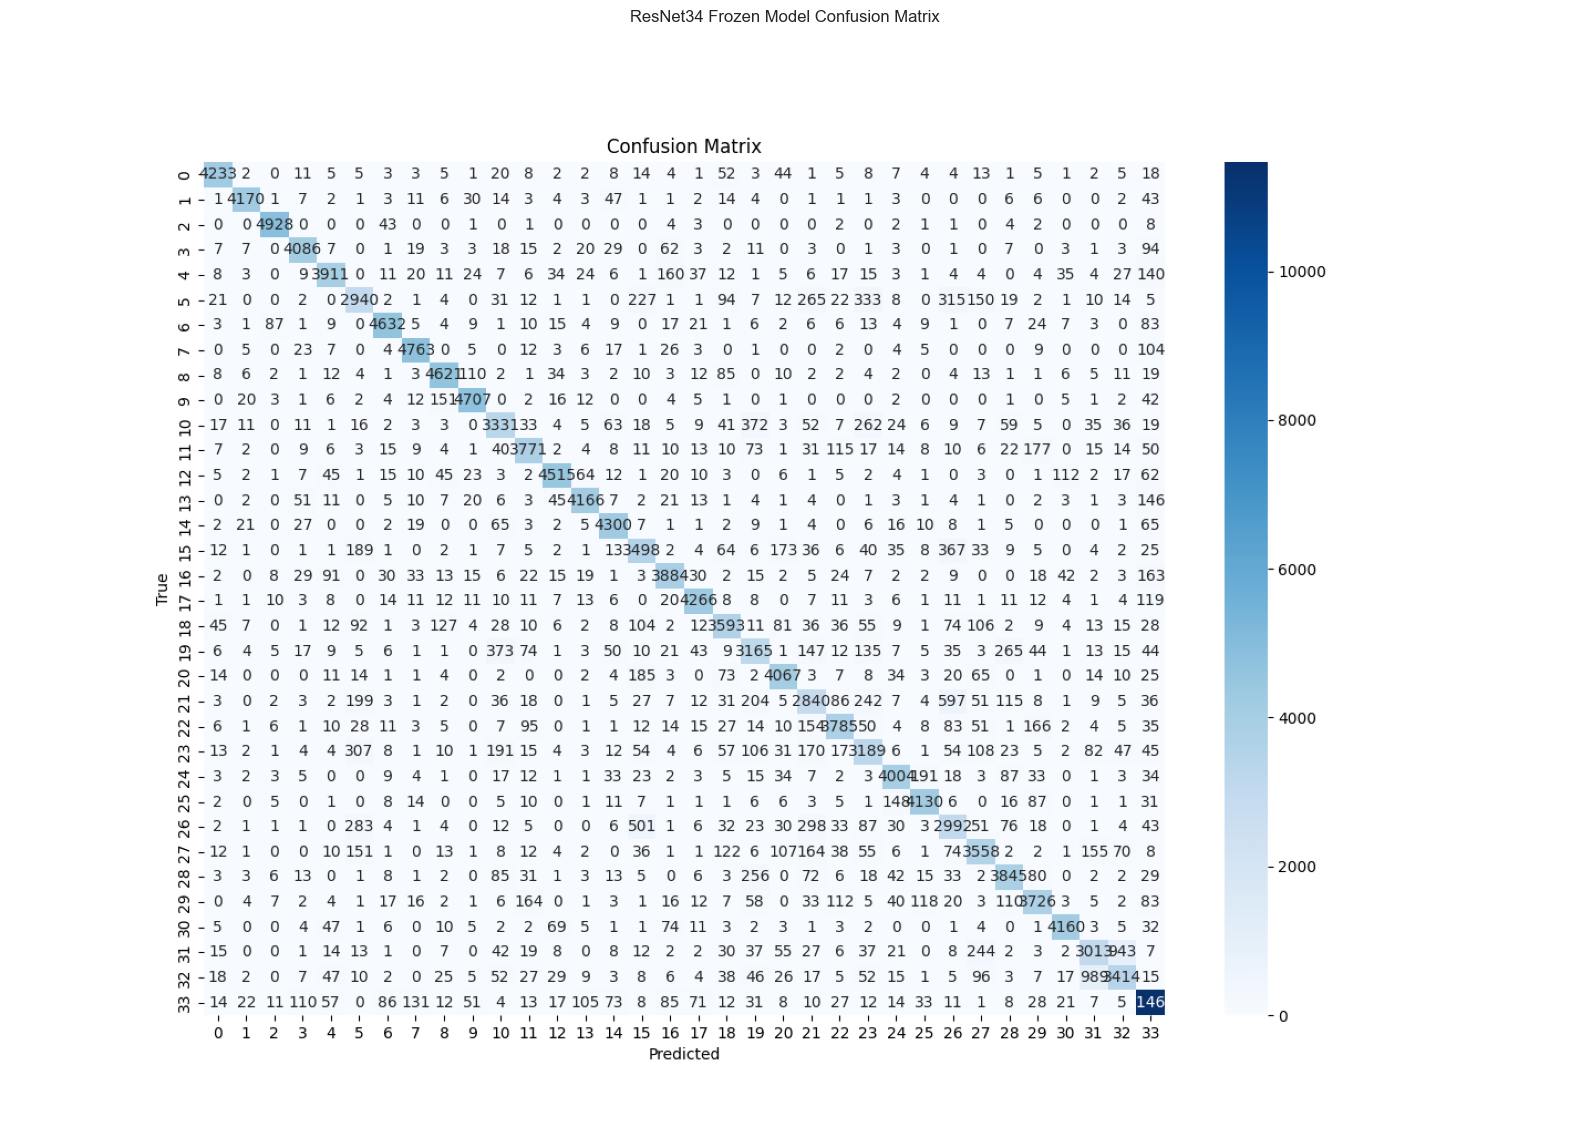

In [23]:
# plot confusion matrix for the frozen model
plt.figure(figsize=(20, 15))
plt.imshow(frozen_cm)
plt.axis('off')
plt.title('ResNet34 Frozen Model Confusion Matrix')
plt.show()

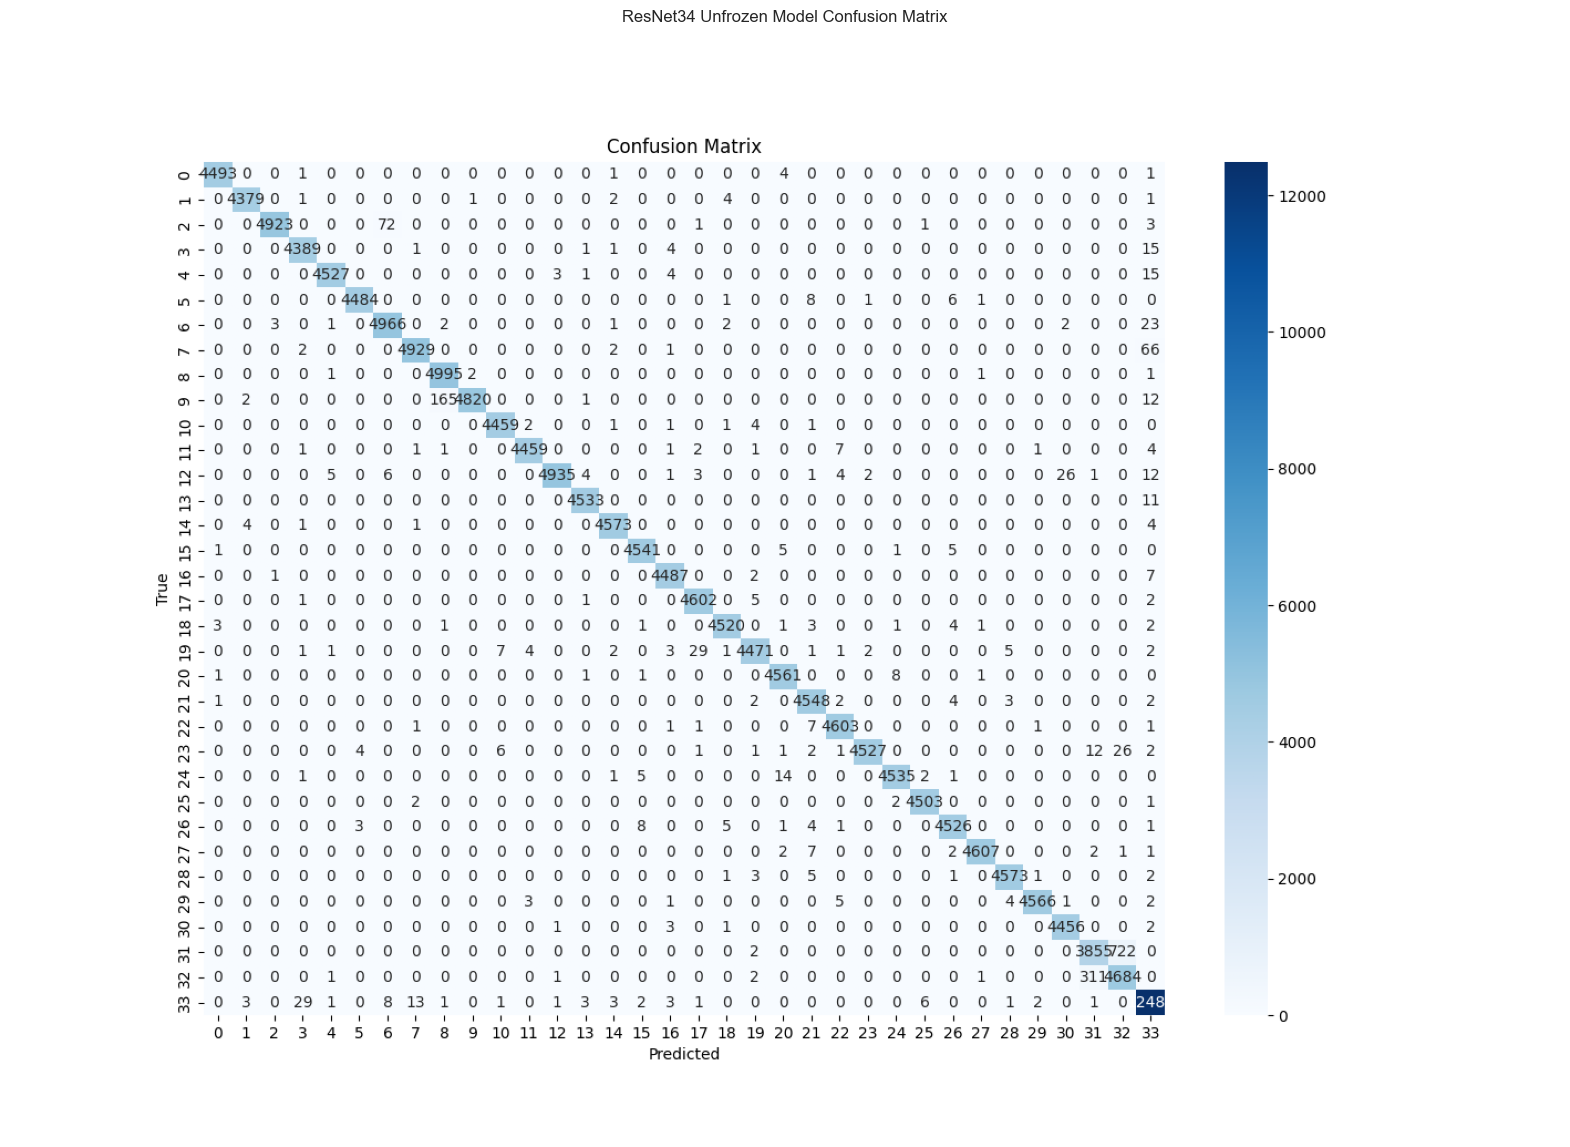

In [24]:
# plot confusion matrix for the unfrozen model
plt.figure(figsize=(20, 15))
plt.imshow(unfrozen_cm)
plt.axis('off')
plt.title('ResNet34 Unfrozen Model Confusion Matrix')
plt.show()